In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pwd

'/Users/gwh/code/AltInt/Inflation_prediction'

In [10]:
path = 'raw_data/final_df.csv'

data = pd.read_csv(path)

In [11]:
df = data.set_index('Date')

In [12]:
df.index = pd.to_datetime(df.index)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2009-01-01 to 2022-09-01
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brent_Crude_GBP  165 non-null    float64
 1   WTI_Crude_GBP    165 non-null    float64
 2   GBP Curncy       165 non-null    float64
 3   GBPEUR Curncy    165 non-null    float64
 4   UKX Index        165 non-null    float64
 5   SPX Index        165 non-null    float64
 6   SX5E Index       165 non-null    float64
 7   Natural_Gas      165 non-null    float64
 8   CPI              163 non-null    float64
 9   RPI              163 non-null    float64
 10  GBP_IRS_2y       165 non-null    float64
 11  GBP_IRS_10y      165 non-null    float64
 12  Nationwide_HPI   164 non-null    float64
 13  RPI YOY          163 non-null    float64
dtypes: float64(14)
memory usage: 19.3 KB


In [14]:
df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_Gas,CPI,RPI,GBP_IRS_2y,GBP_IRS_10y,Nationwide_HPI,RPI YOY
Date,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,84.9,210.1,2.122545,3.757500,300.2,0.142993
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,85.6,211.4,2.129905,3.798333,294.7,0.000000
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,85.8,211.3,2.142045,3.872500,301.1,-0.377181
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,86.0,211.5,2.143250,3.935500,302.9,-1.168224
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,86.4,212.8,2.031900,3.917500,307.2,-1.069270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,120.8,337.1,2.538121,2.240542,538.4,11.659490
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,121.8,340.0,2.933563,2.626558,541.8,11.842105
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,122.5,343.2,2.700779,2.302258,541.0,12.340426


# XGBOOST

In [15]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('seaborn-whitegrid')

In [16]:
### We are only considering time after the stock market crash. Hence, the "split_date"

cutoff_date = "2022-07-01"
XGB_df = df.loc[df.index <= cutoff_date].copy()

In [17]:
XGB_df.isna().sum()

Brent_Crude_GBP    0
WTI_Crude_GBP      0
GBP Curncy         0
GBPEUR Curncy      0
UKX Index          0
SPX Index          0
SX5E Index         0
Natural_Gas        0
CPI                0
RPI                0
GBP_IRS_2y         0
GBP_IRS_10y        0
Nationwide_HPI     0
RPI YOY            0
dtype: int64

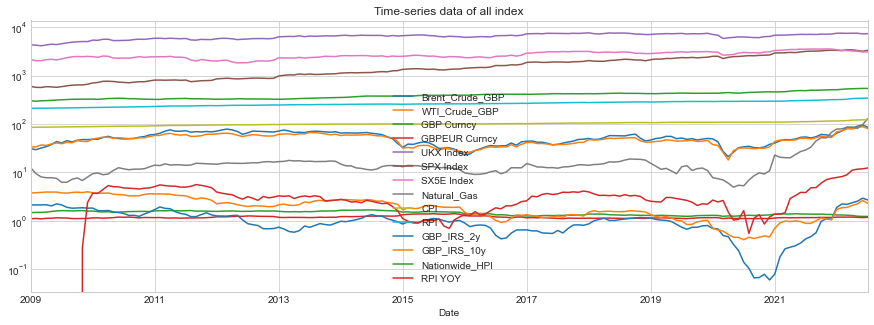

In [18]:
_ = XGB_df.plot( figsize=(15,5), title='Time-series data of all index')
plt.legend(loc='best')
plt.yscale('log')

## Train test split

In [19]:
XGB_train = XGB_df.iloc[:84]
XGB_test = XGB_df.iloc[84:]

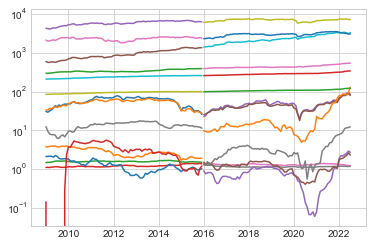

In [20]:
plt.plot(XGB_train)
plt.plot(XGB_test)
plt.yscale('log')

In [21]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# TTFG_decomp_train = seasonal_decompose(XGB_train['TTFG1MON Index'],model = 'multiplicative')
# TTFG_decomp_test = seasonal_decompose(XGB_test['TTFG1MON Index'],model = 'multiplicative')

In [22]:
XGB_train['RPI']

Date
2009-01-01    210.1
2009-02-01    211.4
2009-03-01    211.3
2009-04-01    211.5
2009-05-01    212.8
              ...  
2015-08-01    259.8
2015-09-01    259.6
2015-10-01    259.5
2015-11-01    259.8
2015-12-01    260.6
Name: RPI, Length: 84, dtype: float64

In [23]:
# from statsmodels.tsa.forecasting.stl import STLForecast
# from statsmodels.tsa.arima.model import ARIMA

# STLF = STLForecast(endog = X_train, model= xgb.XGBRegressor)

In [24]:
#STLF.fit()

In [25]:
# TTFG_decomp_train.resid.dropna(inplace = True)
# TTFG_decomp_test.resid.dropna(inplace = True)

In [26]:
### Credits to Rob Mulla from Kaggle: https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['quarter','month','year',
           ]]
    if label:
        y = df[label]
        return X, y
    return X

In [27]:
X_train,y_train= create_features(XGB_train, label = 'RPI')
X_test, y_test = create_features(XGB_test, label = 'RPI')

/var/folders/wv/znl2vtzn0150xwlyckjyk_kh0000gn/T/ipykernel_5328/1243171025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
/var/folders/wv/znl2vtzn0150xwlyckjyk_kh0000gn/T/ipykernel_5328/1243171025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
/var/folders/wv/znl2vtzn0150xwlyckjyk_kh0000gn/T/ipykernel_5328/1243171025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [28]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2009-01-01,0,3,1,1,2009,1,1,1
2009-02-01,0,6,1,2,2009,32,1,5
2009-03-01,0,6,1,3,2009,60,1,9
2009-04-01,0,2,2,4,2009,91,1,14
2009-05-01,0,4,2,5,2009,121,1,18
...,...,...,...,...,...,...,...,...
2015-08-01,0,5,3,8,2015,213,1,31
2015-09-01,0,1,3,9,2015,244,1,36
2015-10-01,0,3,4,10,2015,274,1,40


In [29]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2009-01-01,0,3,1,1,2009,1,1,1
2009-02-01,0,6,1,2,2009,32,1,5
2009-03-01,0,6,1,3,2009,60,1,9
2009-04-01,0,2,2,4,2009,91,1,14
2009-05-01,0,4,2,5,2009,121,1,18
...,...,...,...,...,...,...,...,...
2015-08-01,0,5,3,8,2015,213,1,31
2015-09-01,0,1,3,9,2015,244,1,36
2015-10-01,0,3,4,10,2015,274,1,40


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

RPI_decomp_train = seasonal_decompose(XGB_train['RPI'],model = 'multiplicative')
RPI_decomp_test = seasonal_decompose(XGB_test['RPI'],model = 'multiplicative')


In [31]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(84, 8) (84,) (79, 8) (79,)


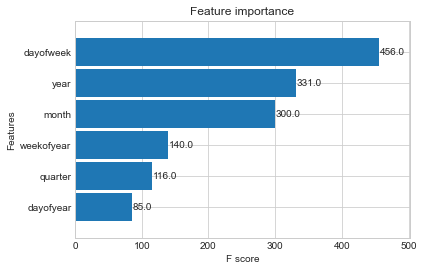

In [33]:
### Feature importance rank
_ = plot_importance(reg, height=0.9)

In [34]:
prediction = pd.Series(reg.predict(X_test))

prediction.index = y_test.index

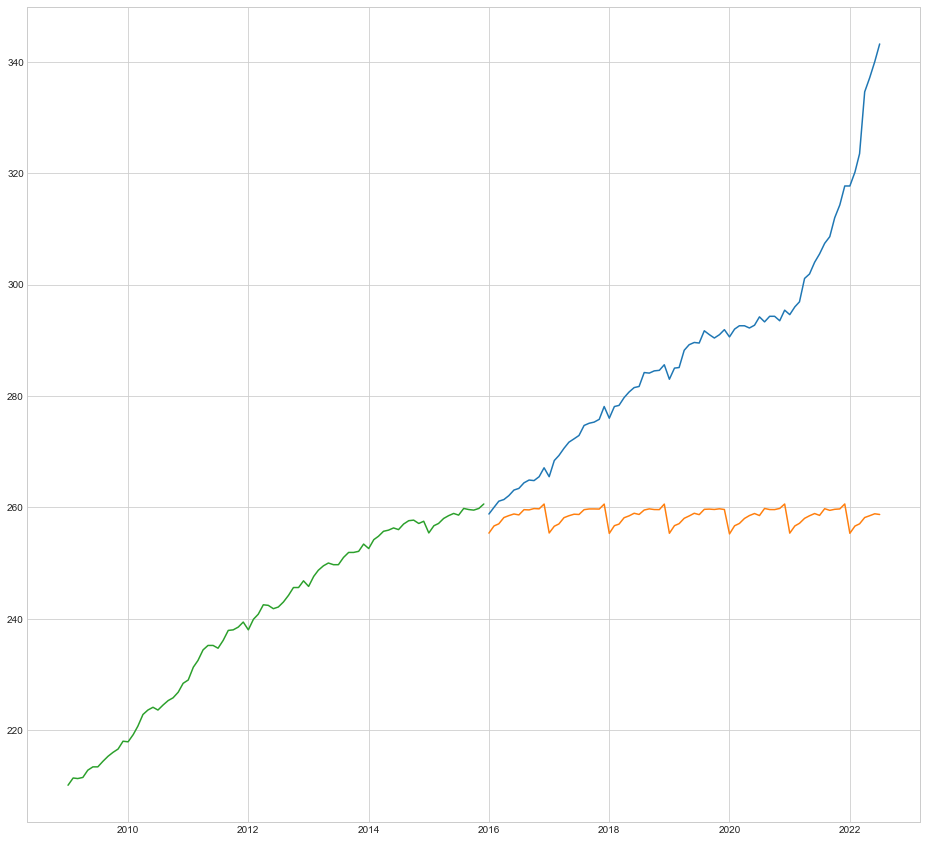

In [35]:
plt.figure(figsize=(16,15))
plt.plot(y_test)
plt.plot(prediction)
plt.plot(y_train)

In [36]:
# ### Creating new Dframe for comparison of predicted values and actual values. (Both are decomposed)
# d = pd.DataFrame({'TTFG1MON Index After S.decomp': \
#                   y_test\
#                   *TTFG_decomp_test.seasonal.loc["2019-01-01":"2022-01-01"] \
#                   *TTFG_decomp_test.trend.loc["2019-01-01":"2022-01-01"],\
#                   'TTFG1MON_Prediction': \
#                   reg.predict(X_test) \
#                   *TTFG_decomp_test.seasonal.loc["2019-01-01":"2022-01-01"] \
#                   *TTFG_decomp_test.trend.loc["2019-01-01":"2022-01-01"]})

## Looking closely at Predicted vs Actual

NameError: name 'd' is not defined

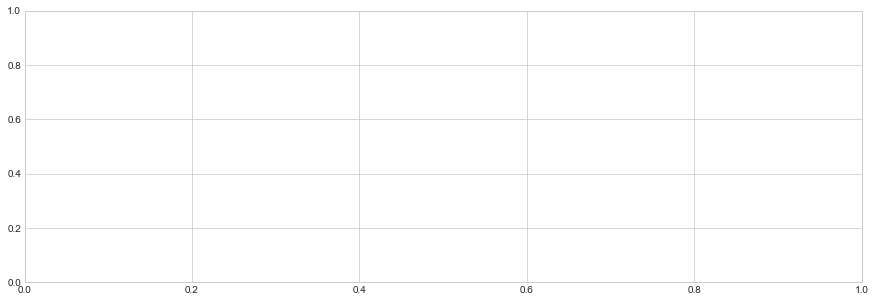

In [39]:
# Plotting
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = d[['TTFG1MON Index After S.decomp','TTFG1MON_Prediction']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='01-01-2019', upper='04-01-2020')
plot = plt.suptitle('01-01-2019 to 04-01-2020 Forecast vs Actuals')

## Metrics for XGB_test

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics  import mean_absolute_percentage_error

mse = mean_squared_error(y_true=d['TTFG1MON Index After S.decomp'],
                   y_pred=d['TTFG1MON_Prediction'])

mae_score = mean_absolute_error(y_true=d['TTFG1MON Index After S.decomp'],
                   y_pred=d['TTFG1MON_Prediction'])

mape_score = mean_absolute_percentage_error(y_true=d['TTFG1MON Index After S.decomp'],
                   y_pred=d['TTFG1MON_Prediction'])

NameError: name 'd' is not defined

In [41]:
print(f"The mean absolute percentage error is {mape_score}")

NameError: name 'mape_score' is not defined

## Deep-diving into best-worst months

In [ ]:
print('p-value: ', adfuller(y)[1])

In [ ]:
print('p-value: ', adfuller(y.diff(1).dropna())[1])

In [ ]:
print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, auto_ylims=True,ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), auto_ylims=True,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), auto_ylims=True, ax=axes[2, 1])

plt.tight_layout()

In [ ]:
differenced_rpi = y.diff(12).diff(12).dropna()
RPI_DIF = pd.DataFrame(differenced_rpi)

differenced_SPX = result_df['SPX Index'].diff().dropna()
SPX_DIF  = pd.DataFrame(differenced_SPX)

differenced_df = RPI_DIF.join(SPX_DIF)




In [ ]:
differenced_df['RPI_dif'] = differenced_df['RPI']

In [ ]:
differenced_df['RPI'] = result_df['RPI']

In [ ]:
differenced_df

In [ ]:
result_df.columns

In [ ]:
def adf_and_diff(tseries):
    """
    Takes in a series/dataframe with column specified and determines whether the time series needs to be stationary or not.
    The function attempts to convert it to a stationary time-series by differencing.
    It also tries to the minimize of orders for differencing. (Maximum 2nd-order in works).
    """
    from statsmodels.tsa.stattools import adfuller
    
    p_value = adfuller(tseries)[1]
    
    differenced_series = tseries
    
      
    while p_value >= 0.05:
        
        p_value = adfuller(differenced_series.diff(12).fillna(0))[1]
        
        differenced_series = differenced_series.diff(12).fillna(0)
        
        print(f'p value is reduced to {p_value}')
        
        print("Differenced")
        
        
            
            
            
    return differenced_series

    

In [ ]:
def decomp(tseries):
    """
    Takes in a series/dataframe performs seasonal decomposition on it
    
    """

In [ ]:
adf_and_diff(result_df['RPI'])

In [ ]:
result.resid.plot()

In [ ]:
result_df['RPI']

In [ ]:
result_df['RPI']

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(result_df['RPI'].dropna(0), model='multiplicable', period=12)

In [ ]:
result_df['RPI'].iloc[6:421]

In [ ]:
result_df['RPI'].reset_index()

In [ ]:
recomposed = result.resid.dropna()* result.trend.dropna()*result.seasonal.dropna().iloc[6:421]


In [ ]:
result.seasonal*

In [ ]:
result_df['RPI'].plot()
recomposed.plot()

In [ ]:
result.seasonal.dropna().iloc[6:421]

In [ ]:
adfuller(result.resid.dropna(0))[1]

In [ ]:
result_df.columns 

In [ ]:
adf_and_diff(result_df['GBPEUR Curncy'])

In [ ]:
adfuller(result_df['RPI'].diff(12).diff(12).fillna(0))[1]

In [ ]:
adfuller(result_df['RPI'].diff(12).diff(12).fillna(0))[1]

In [ ]:
result_df['RPI'].diff(12).diff(12).diff(12).dropna()

# NHITS (Without exogenous features)

In [85]:
RPI_df = df[['RPI']]
RPI_df

,RPI
Date,
2009-01-01,210.1
2009-02-01,211.4
2009-03-01,211.3
2009-04-01,211.5
2009-05-01,212.8
...,...
2022-05-01,337.1
2022-06-01,340.0
2022-07-01,343.2


In [86]:
nhits_train = RPI_df.loc[:"01-01-2020"]
nhits_test = RPI_df.loc["01-01-2020":"01-01-2021"]

In [87]:
### Credits to Rob Mulla from Kaggle: https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [88]:
X_train,y_train= create_features(nhits_train, label = 'RPI')
X_test, y_test = create_features(nhits_test, label = 'RPI')

/var/folders/wv/znl2vtzn0150xwlyckjyk_kh0000gn/T/ipykernel_99278/1243171025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
/var/folders/wv/znl2vtzn0150xwlyckjyk_kh0000gn/T/ipykernel_99278/1243171025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
/var/folders/wv/znl2vtzn0150xwlyckjyk_kh0000gn/T/ipykernel_99278/1243171025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [89]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2009-01-01,0,3,1,1,2009,1,1,1
2009-02-01,0,6,1,2,2009,32,1,5
2009-03-01,0,6,1,3,2009,60,1,9
2009-04-01,0,2,2,4,2009,91,1,14
2009-05-01,0,4,2,5,2009,121,1,18
...,...,...,...,...,...,...,...,...
2019-09-01,0,6,3,9,2019,244,1,35
2019-10-01,0,1,4,10,2019,274,1,40
2019-11-01,0,4,4,11,2019,305,1,44


In [90]:
y_train = pd.DataFrame({'RPI': y_train})

In [91]:
y_train

,RPI
Date,
2009-01-01,210.1
2009-02-01,211.4
2009-03-01,211.3
2009-04-01,211.5
2009-05-01,212.8
...,...
2019-09-01,291.0
2019-10-01,290.4
2019-11-01,291.0


In [94]:
nhits_train

,RPI,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,
2009-01-01,210.1,2009-01-01,0,3,1,1,2009,1,1,1
2009-02-01,211.4,2009-02-01,0,6,1,2,2009,32,1,5
2009-03-01,211.3,2009-03-01,0,6,1,3,2009,60,1,9
2009-04-01,211.5,2009-04-01,0,2,2,4,2009,91,1,14
2009-05-01,212.8,2009-05-01,0,4,2,5,2009,121,1,18
...,...,...,...,...,...,...,...,...,...,...
2019-09-01,291.0,2019-09-01,0,6,3,9,2019,244,1,35
2019-10-01,290.4,2019-10-01,0,1,4,10,2019,274,1,40
2019-11-01,291.0,2019-11-01,0,4,4,11,2019,305,1,44


In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

train_decomp = seasonal_decompose(nhits_train[['RPI']], model = "multiplicative")

pd.DataFrame({"RPI": train_decomp.resid.dropna()})

,RPI
Date,
2009-07-01,0.998528
2009-08-01,0.997790
2009-09-01,0.998299
2009-10-01,0.998753
2009-11-01,0.998483
...,...
2019-03-01,0.994115
2019-04-01,0.999877
2019-05-01,1.001516


In [96]:
nhits_train

,RPI,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,
2009-01-01,210.1,2009-01-01,0,3,1,1,2009,1,1,1
2009-02-01,211.4,2009-02-01,0,6,1,2,2009,32,1,5
2009-03-01,211.3,2009-03-01,0,6,1,3,2009,60,1,9
2009-04-01,211.5,2009-04-01,0,2,2,4,2009,91,1,14
2009-05-01,212.8,2009-05-01,0,4,2,5,2009,121,1,18
...,...,...,...,...,...,...,...,...,...,...
2019-09-01,291.0,2019-09-01,0,6,3,9,2019,244,1,35
2019-10-01,290.4,2019-10-01,0,1,4,10,2019,274,1,40
2019-11-01,291.0,2019-11-01,0,4,4,11,2019,305,1,44


In [97]:
nhits_train[:"2020-01-01"]

,RPI,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,
2009-01-01,210.1,2009-01-01,0,3,1,1,2009,1,1,1
2009-02-01,211.4,2009-02-01,0,6,1,2,2009,32,1,5
2009-03-01,211.3,2009-03-01,0,6,1,3,2009,60,1,9
2009-04-01,211.5,2009-04-01,0,2,2,4,2009,91,1,14
2009-05-01,212.8,2009-05-01,0,4,2,5,2009,121,1,18
...,...,...,...,...,...,...,...,...,...,...
2019-09-01,291.0,2019-09-01,0,6,3,9,2019,244,1,35
2019-10-01,290.4,2019-10-01,0,1,4,10,2019,274,1,40
2019-11-01,291.0,2019-11-01,0,4,4,11,2019,305,1,44


In [103]:
from darts import TimeSeries

series1 = TimeSeries.from_dataframe(nhits_train.loc[:"2019-01-01"], value_cols = 'RPI',\
                                   fill_missing_dates=True, freq=None)

#series2 = TimeSeries.from_dataframe(y_train, value_cols = 'RPI',\
                                   #fill_missing_dates=True, freq=None)


static_covs_single = pd.DataFrame(data={"cont": [1]})

s1sc = series1.with_static_covariates(static_covs_single)

#s2sc = series2.with_static_covariates(static_covs_single)

from darts.models.forecasting.nhits import NHiTSModel as nhits


model = nhits(input_chunk_length= 100, output_chunk_length = 1,num_stacks = 10, num_blocks = 1)

model.fit([s1sc], epochs=50, verbose=True)


2022-09-09 15:14:32 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-09-09 15:14:32 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-09-09 15:14:32 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-09-09 15:14:32 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-09-09 15:14:32 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 3.3 M 
---------------------------------------------------
3.3 M     Trainable params
51.3 K    Non-trainable params
3.3 M     Total params
26.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/Users/gwh/.pyenv/versions/lewagon/lib/python3.8/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
2022-09-09 15:14:35 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=50` reached.


Predicting: 1it [00:00, ?it/s]

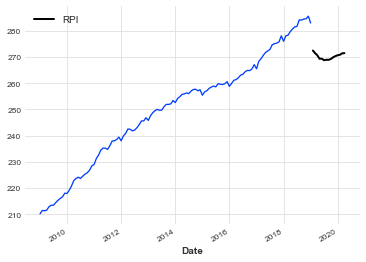

In [104]:
pred_ = model.predict(series=s1sc, n=15)


pred_.plot()
plt.plot(RPI_df.loc[:"2019-01-01"])

In [192]:
train_decomp.seasonal

Date
2009-01-01    0.993957
2009-02-01    0.998657
2009-03-01    0.999391
2009-04-01    1.002573
2009-05-01    1.002618
                ...   
2019-09-01    1.001355
2019-10-01    1.000149
2019-11-01    0.998944
2019-12-01    1.001359
2020-01-01    0.993957
Name: seasonal, Length: 133, dtype: float64

In [44]:
#np.cov(np.reshape(series1.values(), newshape = (163,)))

array(892.09102855)

In [ ]:
## "Undifferencing" the time series.

undiff_pred = pred_.pd_dataframe().cumsum().apply(lambda x: x+298.4)

In [ ]:
plt.plot(differenced_df[4:-12]['RPI'])
plt.plot(undiff_pred)